# Results analysis i2b2 2010  dataset

### Imports

In [20]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, precision_recall_fscore_support

In [21]:
data_file_path = "/Users/lathapevi/Documents/thesis/important_results/i2b2/l1_pre_peft_i2b2_res.txt"
filepath="../datasets/i2b2_2010/new_test.tsv"
train_filepath="../datasets/i2b2_2010/new_train.tsv"

# n2c2_labels = ["Strength-Drug","Form-Drug","Dosage-Drug","Frequency-Drug","Route-Drug","Duration-Drug","Reason-Drug","ADE-Drug"]
i2b2_labels = ['TrIP', 'TrWP','TrCP','TrAP','TrNAP','PIP','TeRP','TeCP']
label2id = {'TrIP': 0, 'TrWP': 1,'TrCP': 2,'TrAP': 3,'TrNAP': 4,'PIP': 5,'TeRP': 6,'TeCP': 7}
id2label = {0: 'TrIP', 1: 'TrWP', 2: 'TrCP', 3: 'TrAP', 4: 'TrNAP', 5: 'PIP', 6: 'TeRP', 7: 'TeCP'}

plot_labels = i2b2_labels

### Load data

In [22]:
# Load the results data file
data = pd.read_csv(data_file_path, header=None)
results_df = pd.concat([data.iloc[0], data.iloc[1]], axis=1)

# Load the train data file
train_data_df = pd.read_csv(train_filepath, header=None, delimiter='\t', names=['sentence', 'label'])

# Loading test data file
test_data_df = pd.read_csv(filepath, header=None, delimiter='\t', names=['sentence', 'label'])


In [23]:
test_data_df.head()

,sentence,label
0,Before this age and for the first 24 months of...,3
1,3. @State newborn screening$ sent per protocol...,6
2,2. @Apnea$ of @prematurity$ .\n,5
3,@Initial differential$ was 35 polys and zero b...,6
4,Initial differential was @35 polys$ and zero b...,6


In [24]:
results_df.columns = ["y_pred","y_true"]
results_df

,y_pred,y_true
0,3,3
1,6,6
2,5,5
3,6,6
4,5,6
...,...,...
6288,6,6
6289,6,6
6290,3,3
6291,5,5


In [25]:
results_df['y_true'].unique()
results_df['y_pred'].unique()

array([3, 6, 5, 2, 0, 4, 7, 1])

In [26]:
idx=10
print(test_data_df.iloc[idx]['sentence'], test_data_df.iloc[idx]['label'])

No intracranial hemorrhage or @CT$ evidence of @acute infarction$ .
 6


### Result analysis

In [27]:
# Create a confusion matrix and other metrics
y_true = results_df["y_true"]
y_preds = results_df["y_pred"]

f1 = f1_score(y_true, y_preds, average='micro')
macro_vals = precision_recall_fscore_support(y_true, y_preds, average='macro')
micro_vals = precision_recall_fscore_support(y_true, y_preds, average='micro')
weighted_vals = precision_recall_fscore_support(y_true, y_preds, average='weighted')
class_vals = precision_recall_fscore_support(y_true, y_preds, average=None)

cm = confusion_matrix(y_true, y_preds, normalize='true')

In [28]:
print(micro_vals)
print(macro_vals)
print(weighted_vals)
print(class_vals)

(0.8921023359288098, 0.8921023359288098, 0.8921023359288098, None)
(0.8345502988030463, 0.6673902761087074, 0.6967163796888448, None)
(0.8943395114610186, 0.8921023359288098, 0.8842945342906863, None)
(array([0.59333333, 1.        , 0.7039801 , 0.86461056, 0.78378378,
       0.96700143, 0.93292395, 0.83076923]), array([0.58552632, 0.18348624, 0.82748538, 0.95496536, 0.25892857,
       0.93093923, 0.95873786, 0.63905325]), array([0.58940397, 0.31007752, 0.76075269, 0.90754458, 0.38926174,
       0.94862773, 0.94565478, 0.72240803]), array([ 152,  109,  342, 1732,  112, 1448, 2060,  338]))


In [29]:
print(classification_report(y_true, y_preds, target_names=plot_labels))

              precision    recall  f1-score   support

        TrIP       0.59      0.59      0.59       152
        TrWP       1.00      0.18      0.31       109
        TrCP       0.70      0.83      0.76       342
        TrAP       0.86      0.95      0.91      1732
       TrNAP       0.78      0.26      0.39       112
         PIP       0.97      0.93      0.95      1448
        TeRP       0.93      0.96      0.95      2060
        TeCP       0.83      0.64      0.72       338

    accuracy                           0.89      6293
   macro avg       0.83      0.67      0.70      6293
weighted avg       0.89      0.89      0.88      6293



In [30]:


def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax,cmap='rocket_r',annot_kws={'size': 7})
    plt.yticks(rotation=0)
    # plt.savefig(filename,bbox_inches='tight')

In [31]:
num_labels = [0,1,2,3,4,5,6,7]

In [32]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_preds, labels=num_labels)

print("Confusion Matrix:")
print(confusion)

cm_df = pd.DataFrame(confusion)

# Calculate ratios
df_ratios = cm_df.div(cm_df.sum(axis=1), axis=0).round(4) *100

# df_norm_col
df_ratios 

Confusion Matrix:
[[  89    0    9   53    0    0    1    0]
 [  21   20   17   45    2    2    2    0]
 [   2    0  283   40    0   13    4    0]
 [  31    0   20 1654    6    5   10    6]
 [   3    0   22   57   29    0    0    1]
 [   3    0   33   41    0 1348   23    0]
 [   1    0   17    8    0   22 1975   37]
 [   0    0    1   15    0    4  102  216]]


,0,1,2,3,4,5,6,7
0,58.55,0.00,5.92,34.87,0.00,0.00,0.66,0.00
1,19.27,18.35,15.60,41.28,1.83,1.83,1.83,0.00
2,0.58,0.00,82.75,11.70,0.00,3.80,1.17,0.00
3,1.79,0.00,1.15,95.50,0.35,0.29,0.58,0.35
4,2.68,0.00,19.64,50.89,25.89,0.00,0.00,0.89
5,0.21,0.00,2.28,2.83,0.00,93.09,1.59,0.00
6,0.05,0.00,0.83,0.39,0.00,1.07,95.87,1.80
7,0.00,0.00,0.30,4.44,0.00,1.18,30.18,63.91


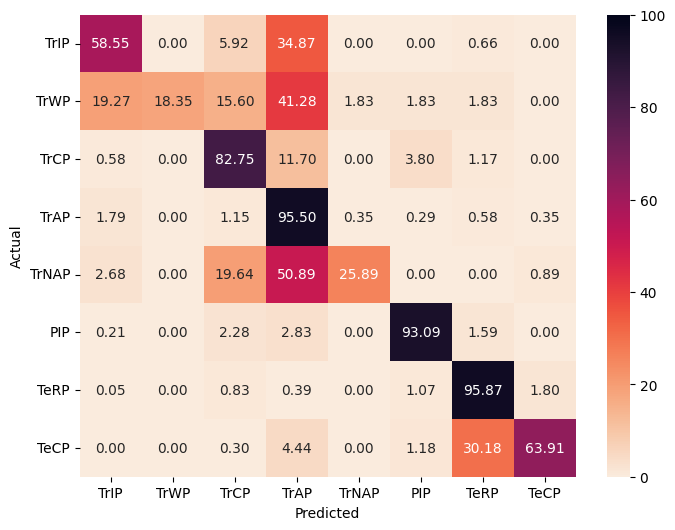

In [33]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_ratios, annot=True,fmt=".2f", cmap='rocket_r',vmin=0, vmax=100, xticklabels=plot_labels, yticklabels=plot_labels )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.savefig("../vsiaulisation/i2b2_final_cm.pdf",bbox_inches='tight')
plt.show()

In [35]:
# # Get unique labels and their respective counts for true and predicted labels
# unique_true_labels, true_label_counts = combined_data_df['y_true'].value_counts().sort_index().index, combined_data_df['y_true'].value_counts().sort_index().values
# unique_predicted_labels, predicted_label_counts = combined_data_df['y_pred'].value_counts().sort_index().index, combined_data_df['y_pred'].value_counts().sort_index().values

# print(unique_true_labels)
# print(unique_predicted_labels)
# bar_width = 0.5 

# # Set position of bar on X axis
# br1 = np.arange(len(unique_true_labels))
# br2 = [x + bar_width for x in br1]

# # Make the plot
# plt.bar(br1, true_label_counts, color ='r', width = bar_width,
#         edgecolor ='grey', label ='IT')
# plt.bar(br2, predicted_label_counts, color ='g', width = bar_width,
#         edgecolor ='grey', label ='ECE')

# # Add labels and title
# plt.xlabel('Class Label')
# plt.ylabel('Count')
# plt.title('Class Importance Plot')
# plt.legend()

# # Show the plot
# plt.show()

In [11]:
# true_grouped = df.groupby('true_labels').size()
# predicted_grouped = df.groupby('predicted_labels').size()

# predicted_grouped.plot(kind='bar', stacked=True, rot=0)
# plt.xlabel('Model 1 Predictions')
# plt.ylabel('Count')
# plt.title('Grouped Bar Chart of Wrongly Classified Datapoints')
# plt.legend(title='Model 2 Predictions', loc='upper right')
# plt.show()

### Class Importance Analysis

In [41]:
data = {
    'true_labels': results_df['y_true'].values.tolist(),
    'predicted_labels': results_df['y_pred'].values.tolist()
}
df = pd.DataFrame(data)
true = df.groupby('true_labels').size().tolist()
preds = df.groupby('predicted_labels').size().tolist()
correct = df[df['true_labels'] == df['predicted_labels']].groupby('true_labels').size().tolist()
print(true)
print(preds)
print(correct)

train_distribution = train_data_df['label'].value_counts()
test_distribution = test_data_df['label'].value_counts()
correct_distribution = df[df['true_labels'] == df['predicted_labels']].value_counts()

[152, 109, 342, 1732, 112, 1448, 2060, 338]
[150, 20, 402, 1913, 37, 1394, 2117, 260]
[89, 20, 283, 1654, 29, 1348, 1975, 216]


In [43]:
print(train_distribution)
print(test_distribution)
print(correct_distribution)

6    993
3    885
5    755
2    184
7    166
4     62
0     51
1     24
Name: label, dtype: int64
6    2060
3    1732
5    1448
2     342
7     338
0     152
4     112
1     109
Name: label, dtype: int64
true_labels  predicted_labels
6            6                   1975
3            3                   1654
5            5                   1348
2            2                    283
7            7                    216
0            0                     89
4            4                     29
1            1                     20
dtype: int64


In [39]:
total_samples = len(results_df)

train_proportion = train_data_df.groupby('label').size().tolist()
num_train_samples = len(train_data_df)
print(train_proportion)
train_prop = []
for num in train_proportion:
    train_prop.append(round(num / num_train_samples, 2))
print(train_prop)

test_proportion = test_data_df.groupby('label').size().tolist()
num_test_samples = len(test_data_df)
test_prop = []
for num in test_proportion:
    test_prop.append(round(num / num_test_samples, 2))
print(test_prop)

correct_prop = []
for pred in preds:
    correct_prop.append(round(pred / num_test_samples, 2))

print(correct_prop)

[51, 24, 184, 885, 62, 755, 993, 166]
[0.02, 0.01, 0.06, 0.28, 0.02, 0.24, 0.32, 0.05]
[0.02, 0.02, 0.05, 0.28, 0.02, 0.23, 0.33, 0.05]
[0.02, 0.0, 0.06, 0.3, 0.01, 0.22, 0.34, 0.04]


/opt/anaconda3/envs/thesis02/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":
/opt/anaconda3/envs/thesis02/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


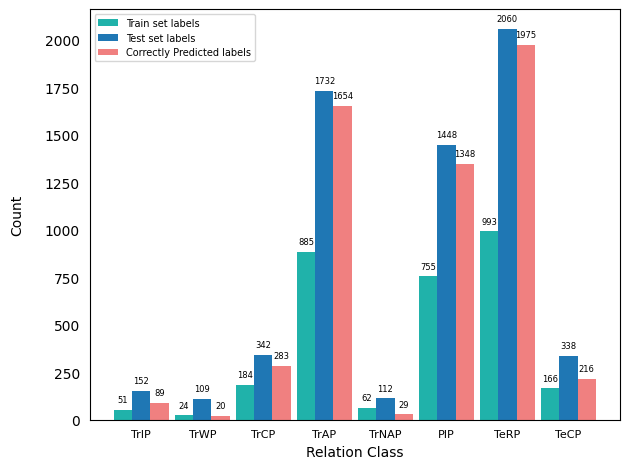

In [40]:
x = np.arange(len(plot_labels))  # the label locations
width = 0.3 # the width of the bars

fig, ax = plt.subplots(layout="constrained")
rects1 = ax.bar(x , train_proportion, width, label='Train set labels', color='lightseagreen')
rects2 = ax.bar(x + width, test_proportion, width, label='Test set labels')
rects3 = ax.bar(x + 2*width, correct, width, label='Correctly Predicted labels', color='lightcoral')

ax.set_xticklabels(plot_labels, fontsize="8")

# ax.set_title('Class Importance Plot - True vs Predicted Labels',fontsize="10")
ax.set_xlabel('Relation Class',fontsize="10")
ax.set_ylabel('Count',fontsize="10",labelpad=15)

ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)

ax.set_xticks(x+width, plot_labels)
ax.tick_params(bottom=False, left=False)

ax.legend(fontsize="7", loc ="upper left")

ax.bar_label(rects1, padding=4, fontsize="6")
ax.bar_label(rects2, padding=4, fontsize="6")
ax.bar_label(rects3, padding=4, fontsize="6")

fig.tight_layout()

plt.savefig("/Users/lathapevi/Documents/git_repos/thesis/src/visualisation/class_importance_plot_i2b2_2010.pdf")
plt.show()



### Error Analysis

In [14]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [15]:
test_data_df['sentence_len'] = test_data_df['sentence'].apply(lambda text: len(word_tokenize(text)))
test_data_df.columns
# data_df = data_df.drop('senetence_len', axis=1)

Index(['sentence', 'label', 'sentence_len'], dtype='object')

In [16]:
wrongly_classified_df = results_df[results_df["y_pred"] != results_df["y_true"]]
correctly_classified_df = results_df[results_df["y_pred"] == results_df["y_true"]]
print("Wrongly classified {}".format(len(wrongly_classified_df)))
print("Correctly classified {}".format(len(correctly_classified_df)))
print("Total {}".format(len(results_df)))

Wrongly classified 679
Correctly classified 5614
Total 6293


In [110]:
wrongly_classified_df.head(5)

,y_pred,y_true
4,5,6
5,5,6
35,2,1
52,6,2
57,3,5


In [17]:
combined_data_df = pd.concat([test_data_df, results_df], axis=1)

In [18]:
combined_data_df.columns

Index(['sentence', 'label', 'sentence_len', 'y_pred', 'y_true'], dtype='object')

In [115]:
# Calculate the total number of wrong predictions
total_wrong_predictions = len(wrongly_classified_df)

# Define bins for text length
bin_edges = [0, 20, 40, 60, 80, float('inf')]
bin_labels = ['0-20', '20-40', '40-60', '60-80', '80+']

# Create a new column 'text_length_bin' to represent the bins
combined_data_df['sentence_len_bin'] = pd.cut(combined_data_df['sentence_len'], bins=bin_edges, labels=bin_labels, right=False)

# Calculate the total number of wrong predictions
# total_wrong_predictions = combined_data_df[combined_data_df['y_true'] != combined_data_df['y_pred']].shape[0]

# Group by text length bins and calculate the proportion of wrong predictions for each group
proportion_wrong_predictions = (
    combined_data_df[combined_data_df['y_true'] != combined_data_df['y_pred']]
    .groupby('sentence_len_bin')
    .size()
    .div(total_wrong_predictions)
    .reset_index(name='proportion_wrong')
)



/opt/anaconda3/envs/thesis02/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


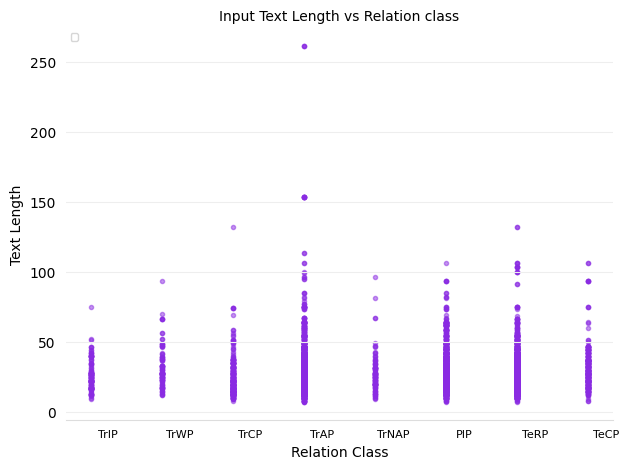

In [123]:
# ANALYSIS THE CLASS LABELS with that of INPUT_LENGTH

fig, ax = plt.subplots()

ax.scatter(test_data_df['label'], test_data_df['sentence_len'], marker=".", alpha=0.5, c="blueviolet")

ax.set_xticklabels(plot_labels, fontsize="8")
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('Input Text Length vs Relation class',fontsize="10")
ax.set_xlabel('Relation Class',fontsize="10")
ax.set_ylabel('Text Length',fontsize="10")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.spines['left'].set_visible(False)

ax.legend(fontsize="7", loc ="upper left")
ax.set_xticks(x+width, plot_labels)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(False)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

fig.tight_layout()

# plt.xticks(labels=plot_labels, fontsize="8")
plt.savefig("/Users/lathapevi/Documents/git_repos/thesis/src/visualisation/class_label_vs_input_length_i2b2_2010.pdf")
plt.show()

In [19]:
combined_data_df['rel'] = combined_data_df['label'].map(id2label)
combined_data_df.head(5)

,sentence,label,sentence_len,y_pred,y_true,rel
0,Before this age and for the first 24 months of...,3,33,3,3,TrAP
1,3. @State newborn screening$ sent per protocol...,6,20,6,6,TeRP
2,2. @Apnea$ of @prematurity$ .\n,5,10,5,5,PIP
3,@Initial differential$ was 35 polys and zero b...,6,19,6,6,TeRP
4,Initial differential was @35 polys$ and zero b...,6,19,5,6,TeRP


In [ ]:
problematic_datapoints = combined_data_df[combined_data_df['y_true'] != combined_data_df['y_pred']]
problematic_datapoints.head(5)

In [126]:
problematic_datapoints.to_csv("/Users/lathapevi/Documents/git_repos/thesis/datasets/i2b2_2010/problematic_datapoints.csv", index=False)

In [32]:
correct_datapoints = combined_data_df[combined_data_df['y_true'] == combined_data_df['y_pred']]
correct_datapoints.head(5)

,sentence,label,sentence_len,y_pred,y_true,sentence_len_bin,rel
0,Before this age and for the first 24 months of...,3,33,3,3,<= 50,TrAP
1,3. @State newborn screening$ sent per protocol...,6,20,6,6,<= 50,TeRP
2,2. @Apnea$ of @prematurity$ .\n,5,10,5,5,<= 50,PIP
3,@Initial differential$ was 35 polys and zero b...,6,19,6,6,<= 50,TeRP
6,Notably with respect to apnea and @bradycardia...,5,33,5,5,<= 50,PIP


In [33]:
problematic_datapoints.iloc[0]['sentence']

'Initial differential was @35 polys$ and zero bands , not suspicious for @infectious condition$ .\n'

In [34]:
problematic_datapoints_TrWP = problematic_datapoints[problematic_datapoints['rel'] == 'TrWP']

In [35]:
problematic_datapoints_TrWP.head(10)

,sentence,label,sentence_len,y_pred,y_true,sentence_len_bin,rel
35,"He was given @D50$ , but continued to have @pr...",1,42,2,1,<= 50,TrWP
79,He has had 2 6 week courses of @antibiotics$ w...,1,17,3,1,<= 50,TrWP
319,@The ascites$ quickly accumulated after @each ...,1,12,2,1,<= 50,TrWP
448,Mr. State was @dyspneic$ speaking in short sen...,1,18,3,1,<= 50,TrWP
493,He was begun on @Physical Therapy$ but remaine...,1,14,2,1,<= 50,TrWP
626,"Despite @Augmentin$ , @the patient &apos;s del...",1,31,0,1,<= 50,TrWP
785,Seen by PMD on 12-14 w/ symptoms of cough prod...,1,28,3,1,<= 50,TrWP
786,Seen by PMD on 12-14 w/ symptoms of @cough$ pr...,1,28,3,1,<= 50,TrWP
927,Cardiac catheterization demonstrates severe tr...,1,39,3,1,<= 50,TrWP
1017,After @treatment with three cycles of fludarab...,1,21,0,1,<= 50,TrWP


In [36]:
problematic_datapoints_TrWP.iloc[7]['sentence']

'Seen by PMD on 12-14 w/ symptoms of @cough$ productive of yellow sputum , which wife also had , prescribed @zpak$ w/o improvement .\n'